In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
path = Path('/home/ubuntu/practice/fast-ai/lesson_3/planet/data')
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/home/ubuntu/practice/fast-ai/lesson_3/planet/data')

## Multi-Class Classification

In [4]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [5]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [6]:
np.random.seed(42)
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(label_delim=' '))

In [7]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

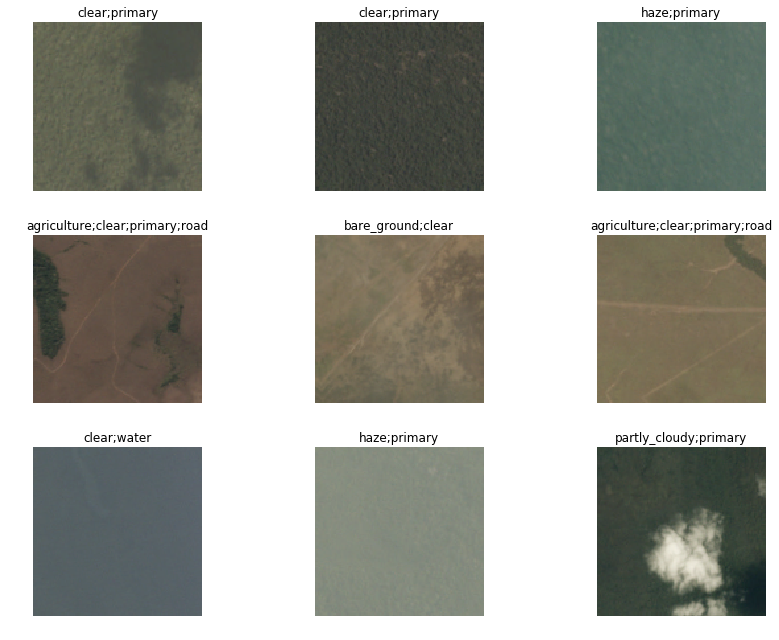

In [8]:
data.show_batch(rows=3, figsize=(12,9))

In [9]:
arch = models.resnet50

In [10]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, arch, metrics=[acc_02, f_score])

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-02


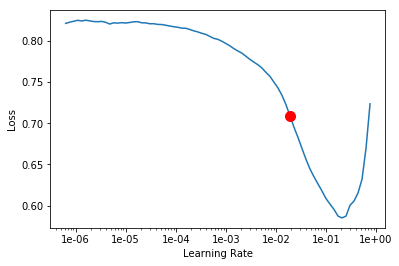

In [12]:
learn.recorder.plot()

In [13]:
lr = 0.01

In [14]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.121771,0.111088,0.950609,0.900526
2,0.110534,0.098202,0.952083,0.913819
3,0.099239,0.092112,0.953748,0.919807
4,0.095028,0.087997,0.954990,0.923737
5,0.091710,0.086639,0.956509,0.925468


In [15]:
learn.save('stage-1-rn50')

In [16]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-06


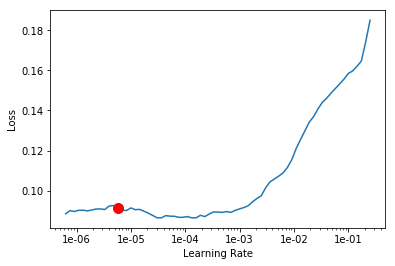

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.097445,0.092880,0.954264,0.919576
2,0.099147,0.091037,0.951902,0.920834
3,0.089898,0.087147,0.957345,0.925246
4,0.085459,0.082752,0.958079,0.929147
5,0.079677,0.082252,0.958660,0.929358


In [19]:
learn.save('stage-2-rn50')

In [20]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06


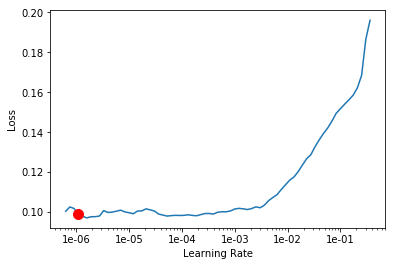

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
lr=1e-2/2

In [23]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.100519,0.101186,0.943560,0.911334
2,0.101103,0.098079,0.951096,0.912521
3,0.096353,0.091347,0.954438,0.921411
4,0.088033,0.083286,0.959074,0.928384
5,0.086942,0.081530,0.958951,0.930622


In [24]:
learn.save('stage-1-256-rn50')

In [25]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.082211,0.081545,0.959110,0.930965
2,0.083929,0.082300,0.958471,0.929211
3,0.082838,0.081425,0.958260,0.930358
4,0.081511,0.080730,0.959685,0.930683


In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('stage-2-256-rn50')

In [ ]:
learn.export()